## Task-2
## Data Insights

### Here is your task
For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - Data Exploration; Model Development and Interpretation.

Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. 

Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.

***Tips: Raw data fields may be transformed into other calculated fields for modelling purposes (i.e. converting D.O.B to age or age groups).  Tips: You may source external data from the ABS / Census to add additional variables that may help support your model.***

### Resources:

- [Link to the Australia Bureau of statistics](https://www.abs.gov.au/statistics?opendocument&ref=topBar)
- [Dataset from Spocket Central](https://cdn-assets.theforage.com/vinternship_modules/kpmg_data_analytics/KPMG_VI_New_raw_data_update_final.xlsx)
- [Optional: A Template presentation to fill in this task](https://cdn-assets.theforage.com/vinternship_modules/kpmg_data_analytics/Module_2_Template_slide.pptx)

In [1]:
import pandas as pd

In [2]:
df = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
df

In [3]:
Transactions = pd.read_excel(df, 'Transactions', skiprows=1)
Transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [4]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [5]:
Transactions.shape

(20000, 13)

In [6]:
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [7]:
Transactions.dropna()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [8]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [9]:
Transactions['product_first_sold_date']

0        41245.0
1        41701.0
2        36361.0
3        36145.0
4        42226.0
          ...   
19995    37823.0
19996    35560.0
19997    40410.0
19998    38216.0
19999    36334.0
Name: product_first_sold_date, Length: 20000, dtype: float64

In [10]:
Transactions['product_first_sold_date'] = pd.to_datetime(Transactions['product_first_sold_date'], unit='s')

In [11]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [12]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46


In [13]:
NewCustomerList = pd.read_excel(df, 'NewCustomerList', skiprows=1)
CustomerDemographic = pd.read_excel(df, 'CustomerDemographic', skiprows=1)
CustomerAddress = pd.read_excel(df, 'CustomerAddress', skiprows=1)

/var/folders/md/tn_62zhs5n50lbz66wqmxvzc0000gn/T/ipykernel_1335/3457915821.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  NewCustomerList = pd.read_excel(df, 'NewCustomerList', skiprows=1)
/var/folders/md/tn_62zhs5n50lbz66wqmxvzc0000gn/T/ipykernel_1335/3457915821.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic = pd.read_excel(df, 'CustomerDemographic', skiprows=1)


In [14]:
NewFile = pd.merge(CustomerDemographic, CustomerAddress, on=['customer_id'])
NewFile.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9


In [15]:
NewFile1 = pd.merge(NewFile, Transactions, on=['customer_id'])
NewFile1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 10:41:22
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,1970-01-01 10:58:46
2,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,1970-01-01 10:30:23
3,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,1970-01-01 10:31:13
4,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 10:42:53


In [16]:
ndf = NewFile1.sort_values(by=['customer_id'])
ndf.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 10:41:22
10,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1970-01-01 09:49:38
8,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,1970-01-01 11:16:58
7,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,1970-01-01 10:22:17
6,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1970-01-01 09:17:35


In [17]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19968 non-null  int64         
 1   first_name                           19968 non-null  object        
 2   last_name                            19326 non-null  object        
 3   gender                               19968 non-null  object        
 4   past_3_years_bike_related_purchases  19968 non-null  int64         
 5   DOB                                  19522 non-null  datetime64[ns]
 6   job_title                            17589 non-null  object        
 7   job_industry_category                16746 non-null  object        
 8   wealth_segment                       19968 non-null  object        
 9   deceased_indicator                   19968 non-null  object        
 10  default   

In [18]:
ndf.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost
count,19968.000000,19968.000000,19522.000000,19968.000000,19968.000000,19968.000000,19968.000000,19609.000000,19968.000000,19773.000000
mean,1740.254307,48.757412,10.681949,2987.623347,7.516376,9997.846504,45.365986,0.500688,1107.780004,556.091050
std,1009.819066,28.611359,5.674631,851.306647,2.824783,5773.929973,30.750115,0.500012,582.852548,405.966472
min,1.000000,0.000000,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000
25%,861.750000,24.000000,6.000000,2200.000000,6.000000,4997.750000,18.000000,0.000000,575.270000,215.140000
50%,1739.500000,48.000000,11.000000,2767.000000,8.000000,9996.500000,44.000000,1.000000,1163.890000,507.580000
75%,2614.250000,73.000000,15.000000,3754.000000,10.000000,14996.250000,72.000000,1.000000,1635.300000,795.100000
max,3500.000000,99.000000,22.000000,4883.000000,12.000000,20000.000000,100.000000,1.000000,2091.470000,1759.850000


In [19]:
ndf.duplicated().sum()

0

In [20]:
ndf.nunique()

customer_id                             3489
first_name                              2835
last_name                               3263
gender                                     6
past_3_years_bike_related_purchases      100
DOB                                     3047
job_title                                195
job_industry_category                      9
wealth_segment                             3
deceased_indicator                         2
default                                   90
owns_car                                   2
tenure                                    22
address                                 3487
postcode                                 835
state                                      5
country                                    1
property_valuation                        12
transaction_id                         19968
product_id                               101
transaction_date                         364
online_order                               2
order_stat

In [21]:
ndf.isnull().sum()

customer_id                               0
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     446
job_title                              2379
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
default                                1451
owns_car                                  0
tenure                                  446
address                                   0
postcode                                  0
state                                     0
country                                   0
property_valuation                        0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            359
order_status                    

In [22]:
ndf.standard_cost.mode()

0    388.92
Name: standard_cost, dtype: float64

In [23]:
ndf.standard_cost.mean()

556.0910499165667

In [24]:
ndf.standard_cost.median()

507.58

In [25]:
ndf['standard_cost'].fillna(ndf['standard_cost'].mean(), inplace=True)

In [26]:
ndf.isnull().sum()

customer_id                               0
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     446
job_title                              2379
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
default                                1451
owns_car                                  0
tenure                                  446
address                                   0
postcode                                  0
state                                     0
country                                   0
property_valuation                        0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            359
order_status                    

In [27]:
ndf['product_first_sold_date'].fillna(method='ffill', inplace=True)

In [28]:
ndf.isnull().sum()

customer_id                               0
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     446
job_title                              2379
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
default                                1451
owns_car                                  0
tenure                                  446
address                                   0
postcode                                  0
state                                     0
country                                   0
property_valuation                        0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            359
order_status                    

In [29]:
ndf['DOB'].fillna(method='ffill', inplace=True)

In [30]:
ndf.isnull().sum()

customer_id                               0
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                       0
job_title                              2379
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
default                                1451
owns_car                                  0
tenure                                  446
address                                   0
postcode                                  0
state                                     0
country                                   0
property_valuation                        0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            359
order_status                    

In [31]:
import datetime as dt

In [32]:
da = dt.datetime.now()
ndf['Age'] = ndf['DOB'].apply(lambda x: len(pd.date_range(start = x, end = da, freq='Y')))

In [33]:
ndf.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 10:41:22,70
10,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1970-01-01 09:49:38,70
8,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,1970-01-01 11:16:58,70
7,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,1970-01-01 10:22:17,70
6,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1970-01-01 09:17:35,70


In [34]:
ndf = ndf[ndf.Age<100]
ndf.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 10:41:22,70
10,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1970-01-01 09:49:38,70
8,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,1970-01-01 11:16:58,70
7,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,1970-01-01 10:22:17,70
6,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1970-01-01 09:17:35,70


In [35]:
ndf['transaction_month'] = pd.DatetimeIndex(ndf['DOB']).month
ndf.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 10:41:22,70,10
10,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1970-01-01 09:49:38,70,10
8,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,1970-01-01 11:16:58,70,10


In [36]:
ndf['profit'] = ndf['list_price'] - ndf['standard_cost']
ndf.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month,profit
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 10:41:22,70,10,110.56
10,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Giant Bicycles,Standard,high,medium,1274.93,764.96,1970-01-01 09:49:38,70,10,509.97
8,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Giant Bicycles,Standard,medium,medium,642.70,211.37,1970-01-01 11:16:58,70,10,431.33


In [37]:
ndf['transaction_date'].head()

0    2017-12-23
10   2017-03-29
8    2017-06-04
7    2017-12-14
6    2017-03-27
Name: transaction_date, dtype: datetime64[ns]

In [38]:
ndf['recent_purchase_date'] = pd.DatetimeIndex(ndf['transaction_date']).date

In [39]:
ndf.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month,profit,recent_purchase_date
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Standard,medium,medium,235.63,125.07,1970-01-01 10:41:22,70,10,110.56,2017-12-23
10,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Standard,high,medium,1274.93,764.96,1970-01-01 09:49:38,70,10,509.97,2017-03-29
8,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Standard,medium,medium,642.70,211.37,1970-01-01 11:16:58,70,10,431.33,2017-06-04
7,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Standard,medium,medium,230.91,173.18,1970-01-01 10:22:17,70,10,57.73,2017-12-14
6,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Mountain,low,small,688.63,612.88,1970-01-01 09:17:35,70,10,75.75,2017-03-27


In [40]:
recently_df = ndf.groupby(by='customer_id', as_index=False)['recent_purchase_date'].max()
recently_df.columns = ['customer_id','LastPurshaceDate']
recently_df.head()

,customer_id,LastPurshaceDate
0,1,2017-12-23
1,2,2017-08-24
2,4,2017-06-18
3,5,2017-12-14
4,6,2017-10-27


In [41]:
ndf['transaction_date'].max()

Timestamp('2017-12-30 00:00:00')

In [42]:
now = dt.date(2017, 12, 30)
print(now)

2017-12-30


In [43]:
recently_df['Recently'] = recently_df['LastPurshaceDate'].apply(lambda x: (now - x).days)

In [44]:
recently_df.head()

,customer_id,LastPurshaceDate,Recently
0,1,2017-12-23,7
1,2,2017-08-24,128
2,4,2017-06-18,195
3,5,2017-12-14,16
4,6,2017-10-27,64


In [45]:
recently_df.drop('LastPurshaceDate', axis=1, inplace=True)

In [46]:
recently_df.head()

,customer_id,Recently
0,1,7
1,2,128
2,4,195
3,5,16
4,6,64


In [47]:
freq_df = ndf.groupby(by=['customer_id'], as_index=False)['transaction_id'].count()
freq_df.columns = ['customer_id', 'Frequency']
freq_df.head()

,customer_id,Frequency
0,1,11
1,2,3
2,4,2
3,5,6
4,6,5


In [48]:
mon_df = ndf.groupby(by=['customer_id'], as_index=False).agg({'profit':'sum'})
mon_df.columns = ['customer_id', 'Monetary']
mon_df.head()

,customer_id,Monetary
0,1,3018.09
1,2,2226.26
2,4,220.57
3,5,2394.94
4,6,3946.55


In [49]:
temp_df = recently_df.merge(freq_df, on='customer_id')
temp_df.head()

,customer_id,Recently,Frequency
0,1,7,11
1,2,128,3
2,4,195,2
3,5,16,6
4,6,64,5


In [50]:
temp_df = temp_df.merge(mon_df, on='customer_id')
temp_df.set_index('customer_id', inplace=True)
temp_df.head()

,Recently,Frequency,Monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
4,195,2,220.57
5,16,6,2394.94
6,64,5,3946.55


In [51]:
temp_df.shape

(3488, 3)

In [52]:
quan = temp_df.quantile(q=[0.25, 0.5, 0.75])
quan

,Recently,Frequency,Monetary
0.25,17.0,4.0,1871.966713
0.50,44.0,6.0,2891.189475
0.75,85.0,7.0,4236.987500


In [53]:
quan.to_dict()

{'Recently': {0.25: 17.0, 0.5: 44.0, 0.75: 85.0},
 'Frequency': {0.25: 4.0, 0.5: 6.0, 0.75: 7.0},
 'Monetary': {0.25: 1871.966712562575,
  0.5: 2891.189475041717,
  0.75: 4236.9875}}

In [54]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [55]:
rfm_segmentation = temp_df
rfm_segmentation['R_Score'] = rfm_segmentation['Recently'].apply(RScore, args=('Recently',quan,))
rfm_segmentation['F_Score'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quan,))
rfm_segmentation['M_Score'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quan,))

In [56]:
rfm_segmentation

,Recently,Frequency,Monetary,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2
6,64,5,3946.55,2,2,3
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,1
3498,127,6,3147.33,1,2,3


In [57]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Score.map(str) \
                            + rfm_segmentation.F_Score.map(str) \
                            + rfm_segmentation.M_Score.map(str)
rfm_segmentation.head()

,Recently,Frequency,Monetary,R_Score,F_Score,M_Score,RFMScore
customer_id,,,,,,,
1,7,11,3018.09,4,4,3,443
2,128,3,2226.26,1,1,2,112
4,195,2,220.57,1,1,1,111
5,16,6,2394.94,4,2,2,422
6,64,5,3946.55,2,2,3,223


In [58]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recently,Frequency,Monetary,R_Score,F_Score,M_Score,RFMScore
customer_id,,,,,,,
1460,12,8,10787.60000,4,4,4,444
1558,8,9,10640.30000,4,4,4,444
729,1,10,10497.78000,4,4,4,444
322,1,12,10341.57000,4,4,4,444
2762,16,10,9679.07895,4,4,4,444
3232,8,13,8903.62000,4,4,4,444
832,17,12,8868.62000,4,4,4,444
2860,8,10,8670.16895,4,4,4,444
1140,6,13,8533.23000,4,4,4,444


In [59]:
#print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
#print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Score']==4]))
#print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Score']==4]))
#print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
#print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
#print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

In [60]:
import numpy as np

In [61]:
rfm_segmentation['Customer_Segmentation'] = np.where(rfm_segmentation['RFMScore'] ==444, "Best Customers",
                                (np.where(rfm_segmentation['F_Score'] == 4,"Loyal Customers",
                                (np.where(rfm_segmentation['M_Score'] == 4, "Big Spenders",
                                (np.where(rfm_segmentation['F_Score'] == 3, "Gold Customers",
                                (np.where(rfm_segmentation['F_Score'] == 2, "Silver Customers",
                                (np.where(rfm_segmentation['RFMScore'] == 244,"Almost Lost",
                               (np.where(rfm_segmentation['RFMScore'] == 144, "Lost Customers",
                               np.where(rfm_segmentation['RFMScore'] == 111,'Lost Cheap Customers', 'Low Value Customers'
                                        ))))))))))))))

In [62]:
rfsegment = pd.merge(rfm_segmentation, ndf, on=['customer_id'])

In [63]:
data = rfsegment.sort_values(by=['customer_id'])
data.head()

,customer_id,Recently,Frequency,Monetary,R_Score,F_Score,M_Score,RFMScore,Customer_Segmentation,first_name,...,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month,profit,recent_purchase_date
0,1,7,11,3018.09,4,4,3,443,Loyal Customers,Laraine,...,Standard,medium,medium,235.63,125.07,1970-01-01 10:41:22,70,10,110.56,2017-12-23
10,1,7,11,3018.09,4,4,3,443,Loyal Customers,Laraine,...,Road,medium,medium,1538.99,829.65,1970-01-01 09:19:12,70,10,709.34,2017-05-19
8,1,7,11,3018.09,4,4,3,443,Loyal Customers,Laraine,...,Road,low,small,1720.70,1531.42,1970-01-01 10:30:23,70,10,189.28,2017-05-11
7,1,7,11,3018.09,4,4,3,443,Loyal Customers,Laraine,...,Standard,medium,medium,360.40,270.30,1970-01-01 10:31:13,70,10,90.10,2017-01-05
6,1,7,11,3018.09,4,4,3,443,Loyal Customers,Laraine,...,Standard,medium,medium,71.49,53.62,1970-01-01 10:42:53,70,10,17.87,2017-02-21


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19959 entries, 0 to 19958
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19959 non-null  int64         
 1   Recently                             19959 non-null  int64         
 2   Frequency                            19959 non-null  int64         
 3   Monetary                             19959 non-null  float64       
 4   R_Score                              19959 non-null  int64         
 5   F_Score                              19959 non-null  int64         
 6   M_Score                              19959 non-null  int64         
 7   RFMScore                             19959 non-null  object        
 8   Customer_Segmentation                19959 non-null  object        
 9   first_name                           19959 non-null  object        
 10  last_name 

In [65]:
data['Customer_Segmentation'].value_counts()

Loyal Customers        6692
Silver Customers       5245
Low Value Customers    3466
Big Spenders           2477
Gold Customers         2079
Name: Customer_Segmentation, dtype: int64

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

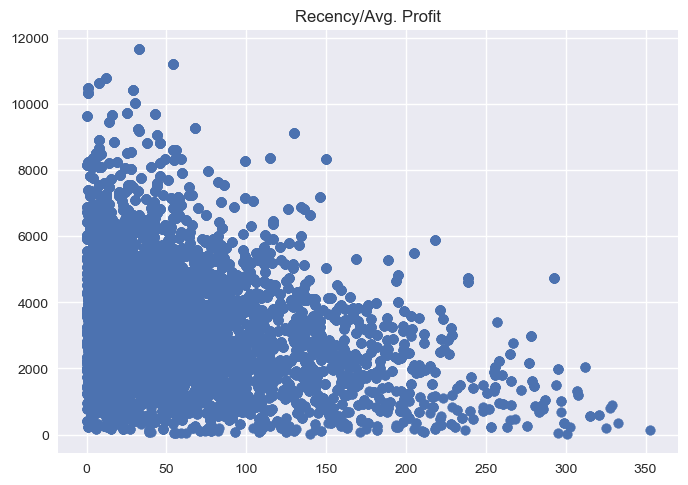

In [131]:
plt.scatter(data['Recently'], data['Monetary'])
plt.title('Recency/Avg. Profit')
plt.style.use('seaborn')
plt.show()

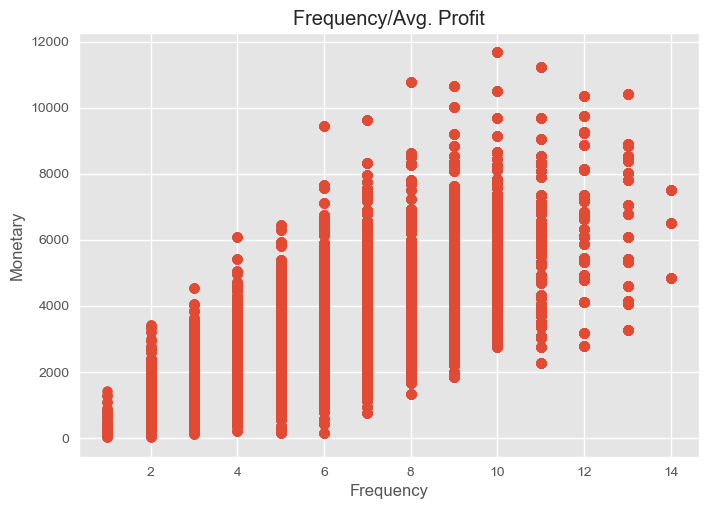

In [128]:
plt.scatter(data['Frequency'], data['Monetary'])
plt.title('Frequency/Avg. Profit')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.style.use('ggplot')

plt.show()

In [125]:
df1 = NewCustomerList
df1.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,customer_id,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,1.04,1.30,1.625,1.38125,1,1,1.718750,0,66.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.52,0.52,0.650,0.55250,1,1,1.718750,1,53.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,0.64,0.64,0.640,0.64000,1,1,1.718750,2,49.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.52,0.65,0.650,0.65000,4,4,1.703125,3,44.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.92,0.92,1.150,1.15000,4,4,1.703125,4,58.0


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [71]:
df1.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.746410,0.837495,0.940070,0.868025,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.204535,0.246613,0.288988,0.275503,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.567500,0.637500,0.712500,0.650000,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.830000,0.920000,0.839375,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.920000,1.012500,1.140625,1.062500,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [72]:
df1.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [73]:
df1['customer_id'] = df1.index

In [74]:
df1.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,customer_id
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,1.04,1.30,1.625,1.38125,1,1,1.718750,0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.52,0.52,0.650,0.55250,1,1,1.718750,1
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.64,0.64,0.640,0.64000,1,1,1.718750,2
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.52,0.65,0.650,0.65000,4,4,1.703125,3
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.92,0.92,1.150,1.15000,4,4,1.703125,4


In [75]:
df1['DOB'] = pd.to_datetime(df1['DOB'], errors='coerce')

In [76]:
df1['DOB'] = df1['DOB'].apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')

In [77]:
df1['DOB'] = df1['DOB'].fillna(df1['DOB'].mode())

In [78]:
date1 = dt.datetime.now()
df1['Age'] = df1['DOB'].apply(lambda x: len(pd.date_range(start = x, end = date1, freq = 'Y'))if str(x) else None)

In [79]:
df1 = df1[df1.Age < 100]

In [80]:
df1['Age'] = df1['Age'].astype(int)

/var/folders/md/tn_62zhs5n50lbz66wqmxvzc0000gn/T/ipykernel_1335/4008704163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = df1['Age'].astype(int)


In [88]:
df1.drop(columns=(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']), axis=1, inplace=True)

/var/folders/md/tn_62zhs5n50lbz66wqmxvzc0000gn/T/ipykernel_1335/1482366956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']), axis=1, inplace=True)


In [89]:
df1.set_index('customer_id', inplace=True)

In [94]:
df1.reset_index(inplace=True)

In [98]:
data1 = df1
data1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,66
1,1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53
2,2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,49
3,3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44
4,4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,58


In [100]:
data.to_csv('CurrentCustomer.csv', index=False)
data1.to_csv('TargetNewCustomers.csv', index=False)